# Real Estate Prices Analysis 

 ## Multi-Linear Regression

## <small> Business Understanding</small>

### <small> Introduction</small>

The core objective of this project is to conduct a comprehensive analysis of house sales data using multiple regression modeling techniques. Through the application of multiple regression, our aim is to ascertain and quantify the relationships between various factors or predictors and house sale prices. This analysis will yield valuable insights into the primary drivers of house prices, facilitating well-informed decision-making for stakeholders involved in real estate investment. An illustrative example includes homeowners and sellers, who can utilize the regression model to estimate the potential value of their properties. By taking into account the influential features identified in the regression analysis, they can evaluate the effects of specific improvements or renovations on property prices and, in turn, make informed choices pertaining to pricing and marketing strategies.

### <small>  Problem Statement</small>

This project aims to underscore the significance of identifying the factors that have a substantial impact on house prices. Conventional approaches often depend on testimonial evidence or limited analysis, leading to unreliable insights. This information gap impedes stakeholders' capacity to accurately anticipate and comprehend house price fluctuations. To resolve this issue, we advocate the comprehensive utilization of multiple regression modeling techniques for the analysis of house sales data. Through multiple regression, we can uncover the relationships between various factors and house sale prices, while considering the combined influence of numerous independent variables.

### <small> Main Objective</small>

To use multiple regression modeling techniques to analyze house sales data with the aim of identifying and quantifying the influential factors affecting house sales prices. This analysis will empower stakeholders to make informed, data-driven decisions concerning their real estate investments.

### <small> General Objectives</small>

1. Perform explanatory data analysis to gain insights into the relationships between different variables and the target variable, facilitating the selection of relevant variables for the regression model.

2. Develop a multiple regression model for predicting house sale prices, taking into account the chosen independent variables and their influence on the dependent variable. Validate the model assumptions, assess its goodness of fit, and make refinements as necessary.

3. Interpret the coefficients of the independent variables within the model to determine their individual impact on house prices. Identify the most influential factors driving house sale prices and describe their respective effects.

4. Evaluate and validate the model's performance to ensure its accuracy and reliability.

5. Provide actionable insights and recommendations based on the analysis to assist real estate investors and policymakers in making informed decisions regarding property investments, understanding market trends, and contributing to effective economic planning.

### <small>  Data Understanding</small>

The dataset utilized in this project encompasses information related to the factors influencing housing prices. It includes variables such as date, sqft_above, view, and sqft_basement. The process of explanatory data analysis is employed to comprehensively understand the dataset. This involves tasks such as identifying missing values, examining data types, detecting outliers, and extracting pertinent features for subsequent analysis. 

##  Reading the data

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

 
import seaborn as sns 
from sklearn.model_selection import train_test_split #for splitting our data into training and testing sets

from sklearn.linear_model import LinearRegression # for creating and training datasets
from sklearn.metrics import mean_squared_error, r2_score #Evaluate model performance

import statsmodels.api as sm # create models
import warnings
#import ydata_profiling

warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv("kc_house_data.csv")

# view the head of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Previewing the dataset

In [5]:
# We preview the datatset using pandas profiling

In [6]:
def dataframe_preview(df):
    #To get the shape of the dataframe
    print("The shape of the dataframe:")
    print(df.shape)
    print('\n')
    #To get the info of the dataframe
    print("The data in the dataframe:")
    print(df.info())
    print('\n')

dataframe_preview(data)

The shape of the dataframe:
(21597, 21)


The data in the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-

##  Data cleaning

In [7]:
# Check for null values
pd.DataFrame(data.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,2376,63,...,0,0,0,0,3842,0,0,0,0,0


In [8]:
data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [9]:
# filling  in missing  data values with the most frequently occurring value

data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode().iloc[0])

In [10]:
data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [11]:
# Deal with missing values in the view column
# Check for the counts of different categories
data['view'].value_counts()


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
# check for the count unique values in the year renoveted column 
data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
# Replace null with the most frequent value
data['yr_renovated'].fillna(0,inplace=True)

In [14]:
#iterate through the columns to see the frequency of different values
for i in data.columns:
    print(data[i].value_counts())

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
07/08/2014    127
4/27/2015     126
             ... 
11/02/2014      1
1/31/2015       1
5/24/2015       1
5/17/2014       1
7/27/2014       1
Name: date, Length: 372, dtype: int64
450000    172
350000    172
550000    159
500000    152
425000    150
         ... 
278800      1
439888      1
354901      1
942000      1
402101      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71


In [15]:
# Drop rows with '?' in 'sqft_basement'
data = data[data['sqft_basement'] != '?']

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [16]:
# Convert 'sqft_basement' column to float
data['sqft_basement'] = data['sqft_basement'].astype(float)

##  Explanatory Data Analysis

In [17]:
# Check the shape of the dataset
(data.shape)

(21143, 21)

In [18]:
# Overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  int64  
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21082 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

In [19]:
# Dataset description
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


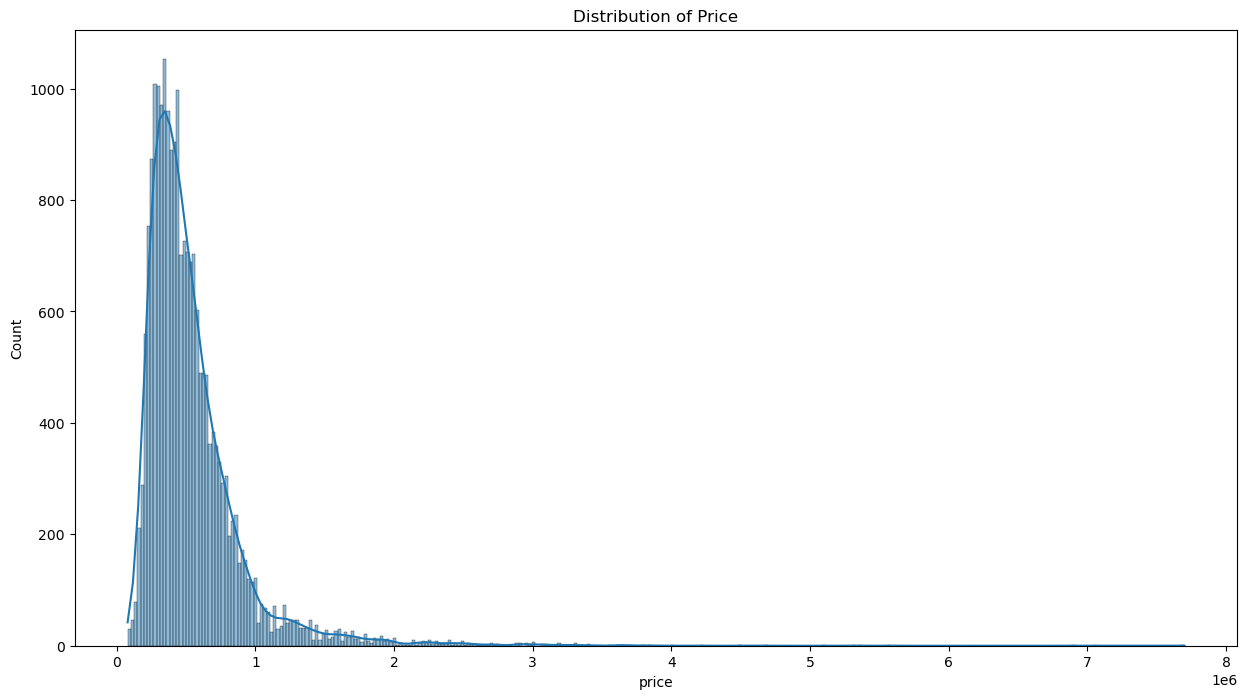

In [20]:
# Distribution of price 
plt.figure(figsize=(15, 8))
sns.histplot(data=data, x='price', kde=True)
plt.title("Distribution of Price")
plt.show()

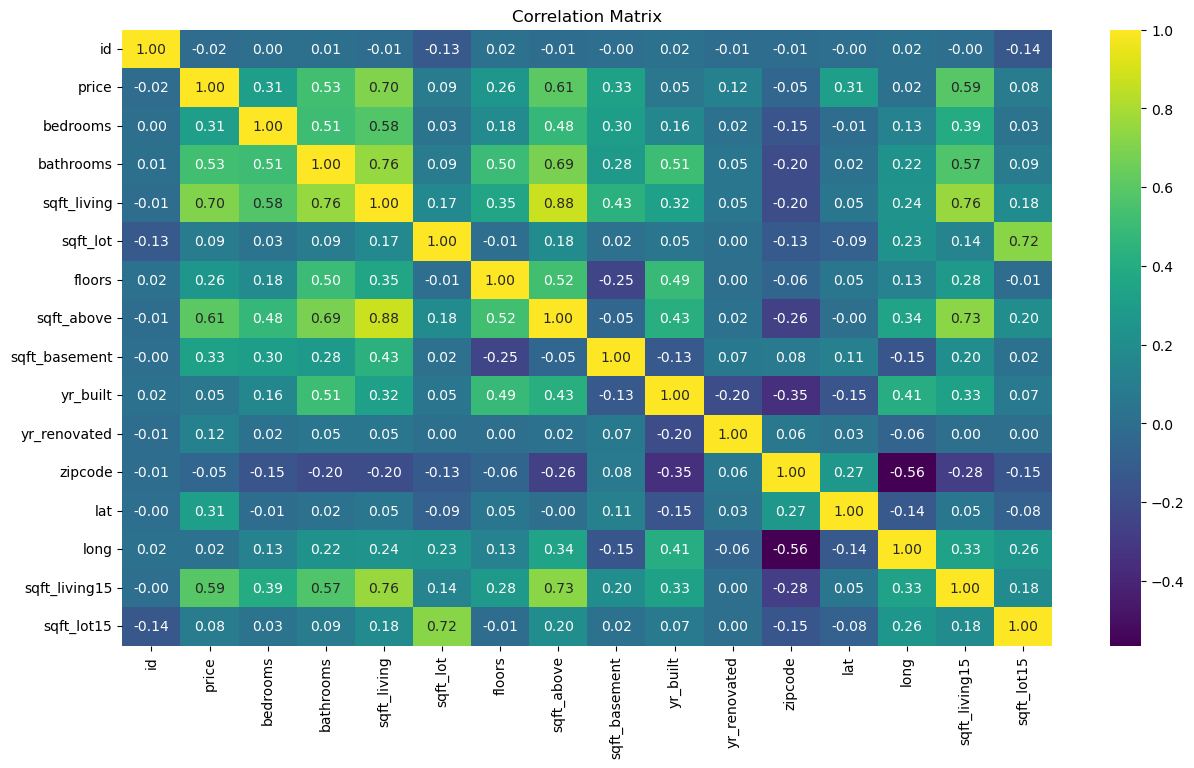

In [21]:
# Correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

From the heatmap we are interested in variables with a correlation of 0.5 

In [22]:
# Calculate the correlation of the dataframe and pair the highly correlated variables

correlation = data.corr().unstack()
correlation = correlation.where((correlation >= 0.75) & (correlation < 1)).dropna().sort_values(ascending=True)
correlation


bathrooms      sqft_living      0.755278
sqft_living    bathrooms        0.755278
               sqft_living15    0.756389
sqft_living15  sqft_living      0.756389
sqft_living    sqft_above       0.876678
sqft_above     sqft_living      0.876678
dtype: float64

###  Encoding Categorical Columns in the Data

In [23]:
data_encoded = pd.get_dummies(data, columns= ['waterfront', 'view', 'condition', 'grade'])
data_encoded.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# View columns encoded
data_encoded.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_NO', 'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT',
       'view_FAIR', 'view_GOOD', 'view_NONE', 'condition_Average',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low',
       'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [25]:
# Dropping encoded categorical data

data_updated = data_encoded.drop(['waterfront_YES', 'waterfront_NO',
'view_AVERAGE',
'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'view_NONE','condition_Average', 'condition_Fair', 'condition_Good',
'condition_Poor', 'condition_Very Good', 'grade_10 Very Good','grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
'grade_7 Average', 'grade_8 Good', 'grade_9 Better'], axis=1)


In [26]:
data_updated.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
# Check the correlation between the independent factors and the target variable house prices
pd.DataFrame(data_updated.corr()['price']).sort_values(by='price',ascending=False)

,price
price,1.000000
sqft_living,0.702328
sqft_above,0.605143
sqft_living15,0.586415
bathrooms,0.525889
sqft_basement,0.325008
bedrooms,0.309204
lat,0.306507
floors,0.256355
yr_renovated,0.116719


Sqft_living has the highest positive correlation coefficient (0.702328) of the results above, suggesting a somewhat strong positive linear association with property price. The price often rises in proportion to the living area's square footage.
Additionally, sqft_above has a reasonably high positive linear association with the price, as seen by its positive correlation value of 0.605143. The square footage of the living area above ground level is represented by it.
The weakly positive correlation coefficient for sqft_lot is 0.087937. It is a representation of the property's land area square footage.
id: The feature's -0.015796 weakly negative correlation coefficient.  It represents the identifier of the property, which is not meaningful in terms of correlation with price.
The correlation coefficient between zipcode and negative values is -0.053166. It stands for the property's zipcode, which likewise has little relationship with pricing.

Remember that a correlation does not indicate a cause. There may be other factors influencing a property's price that the dataset does not capture; these correlation coefficients simply show the linear link between the attributes and the price in the dataset.


###  Formating Date Types

In [28]:
data_updated.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,05/12/2014,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
7,2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
8,3793500160,03/12/2015,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
9,1736800520,04/03/2015,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [29]:
# Convert "yr_renovated" column to integer
data_updated["yr_renovated"] = data_updated["yr_renovated"].astype(int)

In [30]:
# Drop rows with invalid dates
data_updated = data_updated.dropna(subset=['date'])

# Convert the date column to datetime
data_updated['date'] = pd.to_datetime(data_updated['date'])

# Calculate years since built
data_updated['years_since_built'] = data_updated['date'].dt.year - data_updated['yr_built']

# Calculate years to renovation
data_updated['years_since_renovation'] =np.abs(data_updated['yr_renovated']- data_updated['yr_built']) 
data_updated['years_since_renovation'] = data_updated.years_since_renovation.apply(lambda x: x if len(str(int(x)))==2 else 0.0)


# Check the updated dataset
data_updated.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
5,7237550310,2014-05-12,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,13,0.0
6,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711,52,0.0
7,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113,55,0.0
8,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570,12,0.0
9,1736800520,2015-04-03,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0,98007,47.6007,-122.145,2210,8925,50,0.0


In [31]:
# Replace values greater than 50 in years_since_renovation with years_since_built
data_updated.loc[data_updated['years_since_renovation'] > 100, 'years_since_renovation'] = data_updated['years_since_built']

# Check the updated dataset
data_updated.head(10)
# This will take into account the huge numbers that comes as a result of having a 0 as our time of renovation, so we will take the time since building as our time since renovation

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,years_since_built,years_since_renovation
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,59,0.0
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,63,40.0
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,82,0.0
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,49,0.0
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,28,0.0
5,7237550310,2014-05-12,1230000,4,4.50,5420,101930,1.0,3890,1530.0,2001,0,98053,47.6561,-122.005,4760,101930,13,0.0
6,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,1060,0.0,1963,0,98198,47.4095,-122.315,1650,9711,52,0.0
7,2414600126,2015-04-15,229500,3,1.00,1780,7470,1.0,1050,730.0,1960,0,98146,47.5123,-122.337,1780,8113,55,0.0
8,3793500160,2015-03-12,323000,3,2.50,1890,6560,2.0,1890,0.0,2003,0,98038,47.3684,-122.031,2390,7570,12,0.0
9,1736800520,2015-04-03,662500,3,2.50,3560,9796,1.0,1860,1700.0,1965,0,98007,47.6007,-122.145,2210,8925,50,0.0


###  Feature Engineering

In [32]:

# Extract the month from the 'date' column
data_updated['month'] = data_updated['date'].dt.month

# Map the month values to corresponding seasons
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
data_updated['season'] = data_updated['month'].map(seasons)

# Drop the 'date' and 'month' columns
df_updated = data_updated.drop(['date', 'month'], axis=1)

In [33]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21143 entries, 0 to 21142
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21143 non-null  int64  
 1   price                   21143 non-null  int64  
 2   bedrooms                21143 non-null  int64  
 3   bathrooms               21143 non-null  float64
 4   sqft_living             21143 non-null  int64  
 5   sqft_lot                21143 non-null  int64  
 6   floors                  21143 non-null  float64
 7   sqft_above              21143 non-null  int64  
 8   sqft_basement           21143 non-null  float64
 9   yr_built                21143 non-null  int64  
 10  yr_renovated            21143 non-null  int32  
 11  zipcode                 21143 non-null  int64  
 12  lat                     21143 non-null  float64
 13  long                    21143 non-null  float64
 14  sqft_living15           21143 non-null

In [34]:
df_updated['season'].unique()

array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the 'season' column and transform the values
data_updated['season_encoded'] = encoder.fit_transform(data_updated['season'])

# Drop the original 'season' column
data_updated = data_updated.drop('season', axis=1)

In [36]:
#Dropping  Columns

data_updated.drop(['id','yr_built','yr_renovated','zipcode','long','date'], axis=1,inplace=True)
data_updated.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15,years_since_built,years_since_renovation,month,season_encoded
0,221900,3,1.00,1180,5650,1.0,1180,0.0,47.5112,1340,5650,59,0.0,10,0
1,538000,3,2.25,2570,7242,2.0,2170,400.0,47.7210,1690,7639,63,40.0,12,3
2,180000,2,1.00,770,10000,1.0,770,0.0,47.7379,2720,8062,82,0.0,2,3
3,604000,4,3.00,1960,5000,1.0,1050,910.0,47.5208,1360,5000,49,0.0,12,3
4,510000,3,2.00,1680,8080,1.0,1680,0.0,47.6168,1800,7503,28,0.0,2,3


In [37]:
# updated data correlation

data_updated.corr()['price'].sort_values(ascending=False)

price                     1.000000
sqft_living               0.702328
sqft_above                0.605143
sqft_living15             0.586415
bathrooms                 0.525889
sqft_basement             0.325008
bedrooms                  0.309204
lat                       0.306507
floors                    0.256355
years_since_renovation    0.109440
sqft_lot                  0.087937
sqft_lot15                0.083192
season_encoded           -0.008051
month                    -0.010234
years_since_built        -0.054382
Name: price, dtype: float64

##  Regression Model

###  Baseline Model

In [38]:

# Drop the 'price' column and features that would result in major errors

X = data_updated.drop(['price'], axis=1)  

# Handle missing values if any exist
X = X.fillna(0)  # Fill missing values with 0, but you may use other strategies

# Encode categorical variables if necessary
# ...

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data_updated['price'], test_size=0.2, random_state=42)

# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 52663832111.64405
R-squared (R2) Score: 0.6006023364812427


The average squared difference between the expected and actual values is measured by the mean squared error, or MSE. In this instance, the MSE value of 52663832111.654076 shows that, on average, there is a difference of about $52,663,724832,409321.11 (in squared units of the target variable) between the actual prices and the predicted prices from the model. Better performance is indicated by a smaller mean square error (MSE), which denotes less variation between the actual and predicted values.

A statistical metric termed as the R-squared (R2) score indicates the percentage of the target variable's fluctuations that can be accounted for by the independent variables in the model. A value nearer one on the R2 score scale denotes a better fit. The score runs from 0 to 1. The R2 score of 0.6949318023706679 in our baseline model indicates that the features included in the model can account for roughly 60% of the variance of the target variable, price.


These metrics offer an initial assessment of the performance of the baseline model. However, there is potential for improvement, and we may move forward with iterations of the model to increase its predictive capacity.


##  Model Iterations

Let's check the correlation between the variables with respect to the dependent variable, price.

In [39]:
data_updated.corr()['price'].sort_values(ascending=False)

price                     1.000000
sqft_living               0.702328
sqft_above                0.605143
sqft_living15             0.586415
bathrooms                 0.525889
sqft_basement             0.325008
bedrooms                  0.309204
lat                       0.306507
floors                    0.256355
years_since_renovation    0.109440
sqft_lot                  0.087937
sqft_lot15                0.083192
season_encoded           -0.008051
month                    -0.010234
years_since_built        -0.054382
Name: price, dtype: float64

###  Relationship between Predictor Variables

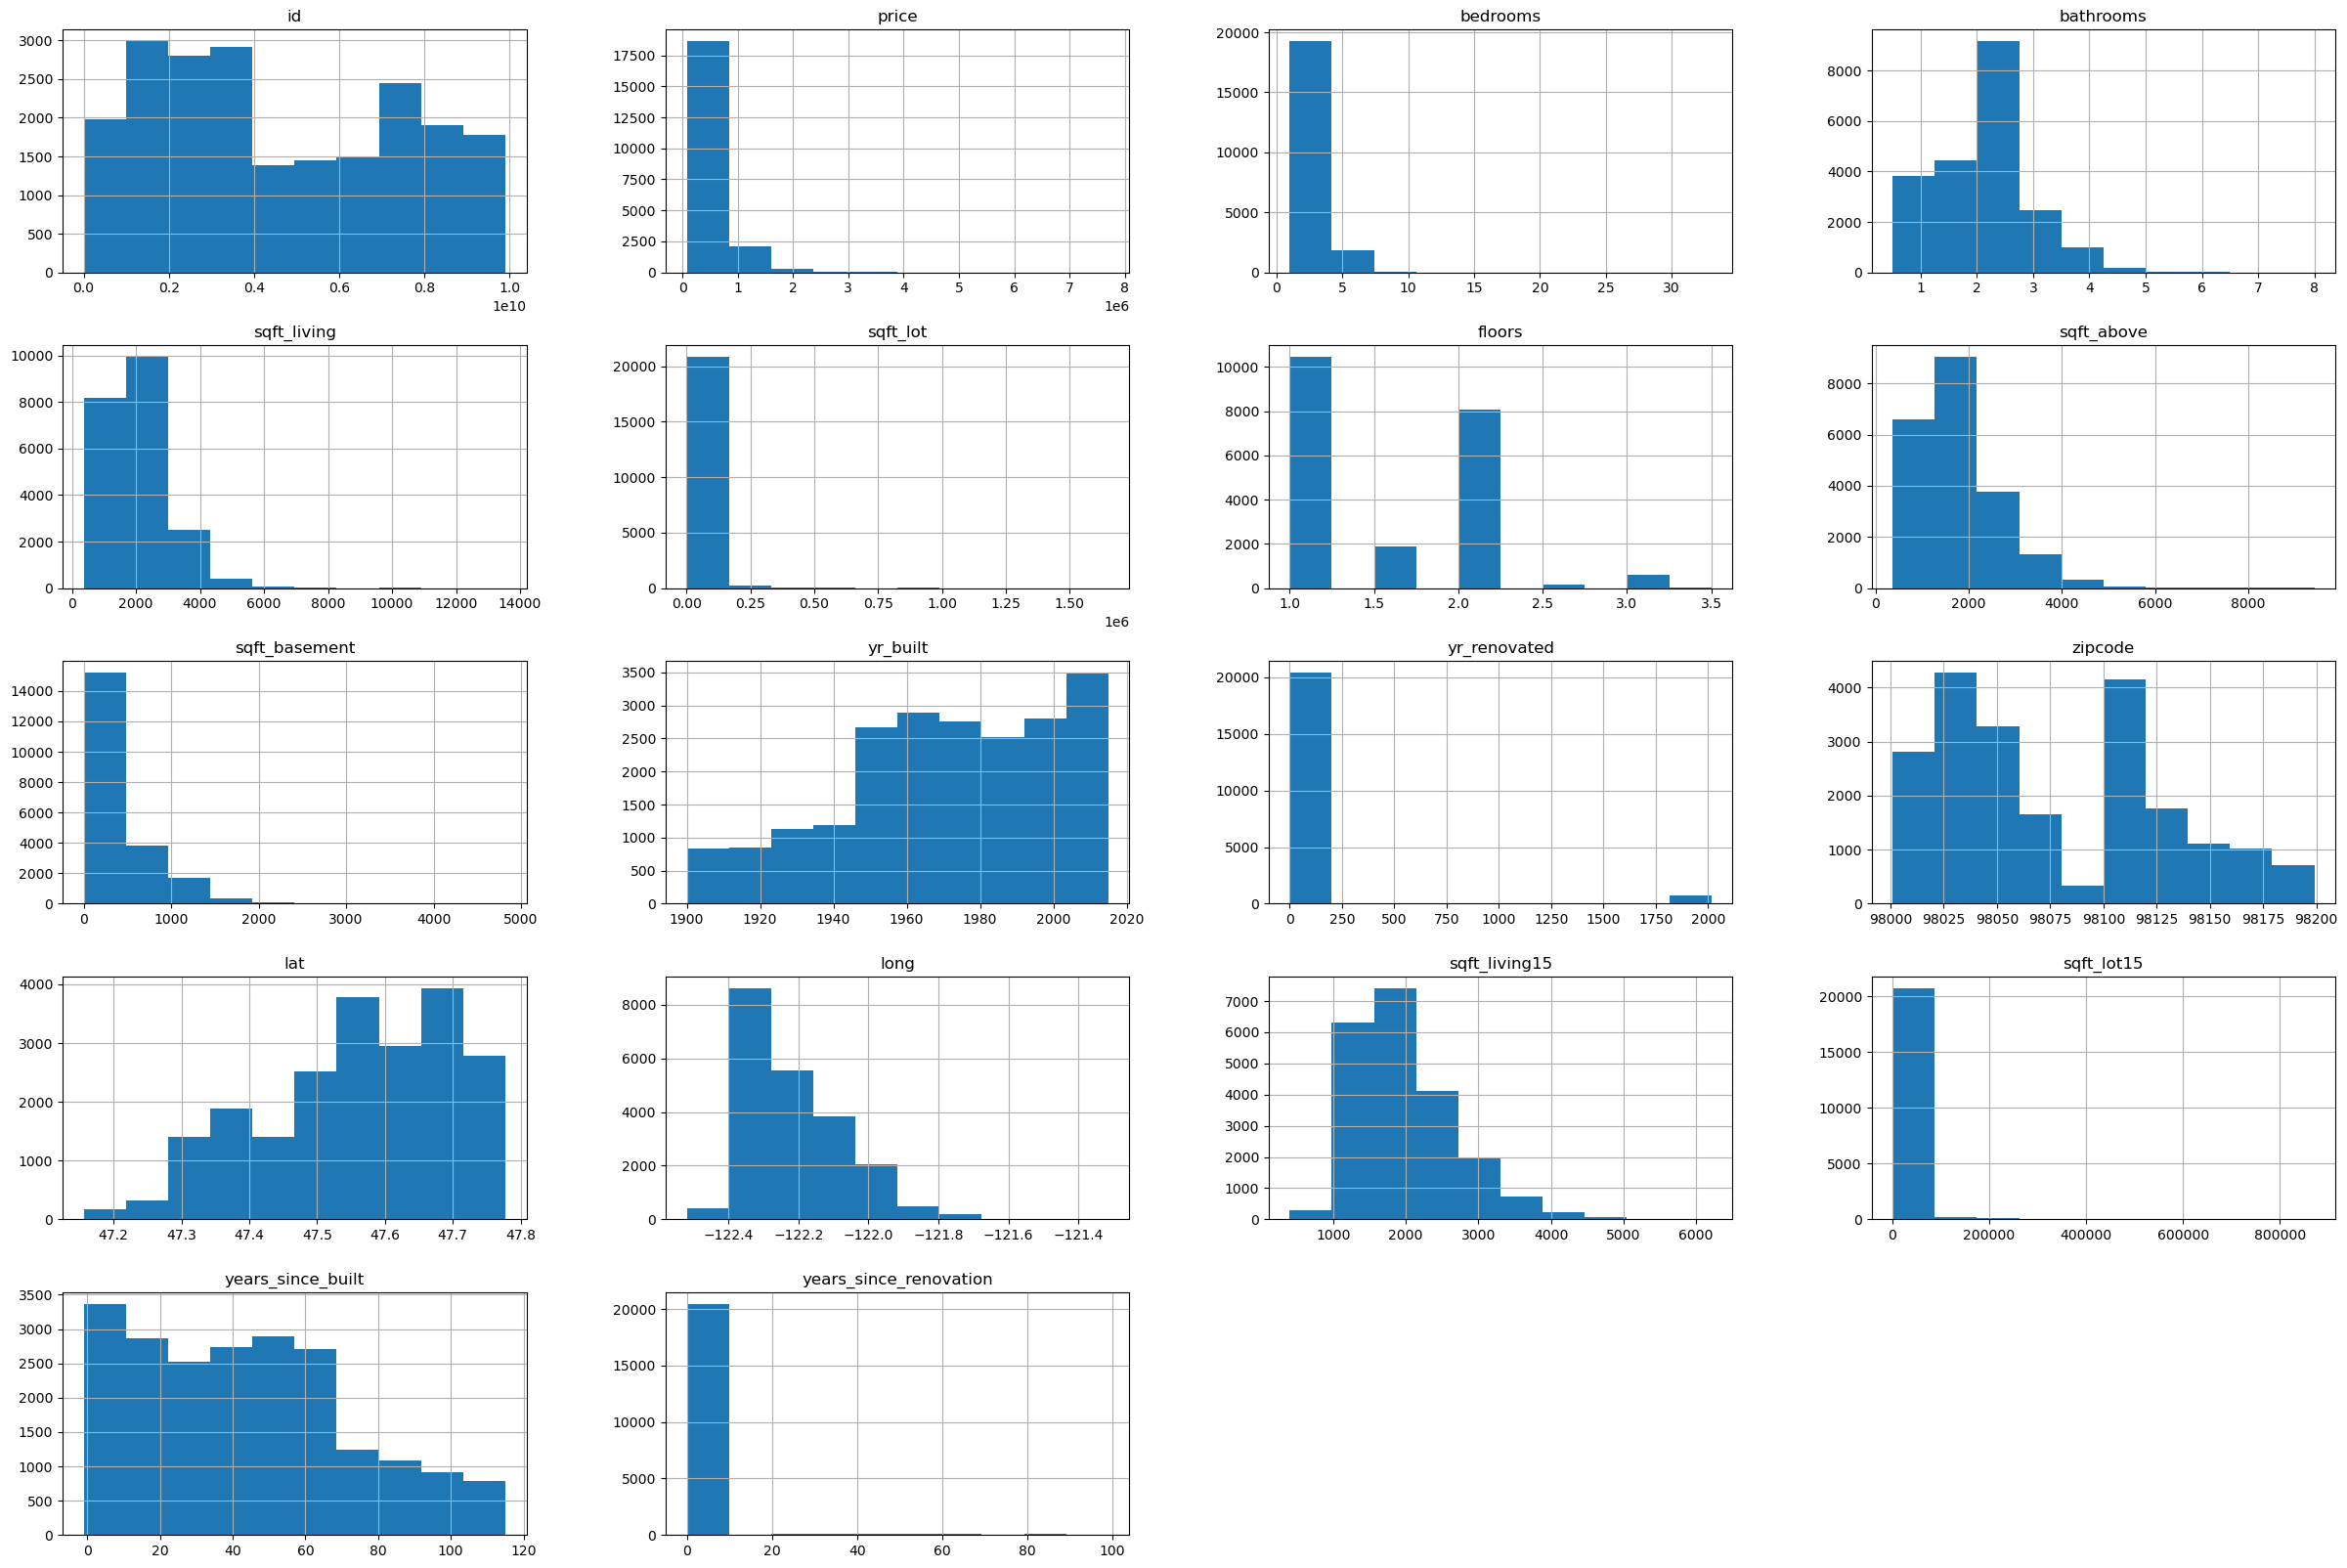

In [40]:
# plot the frequency for the data columns

df_updated.hist(figsize=(30,20))
plt.show()

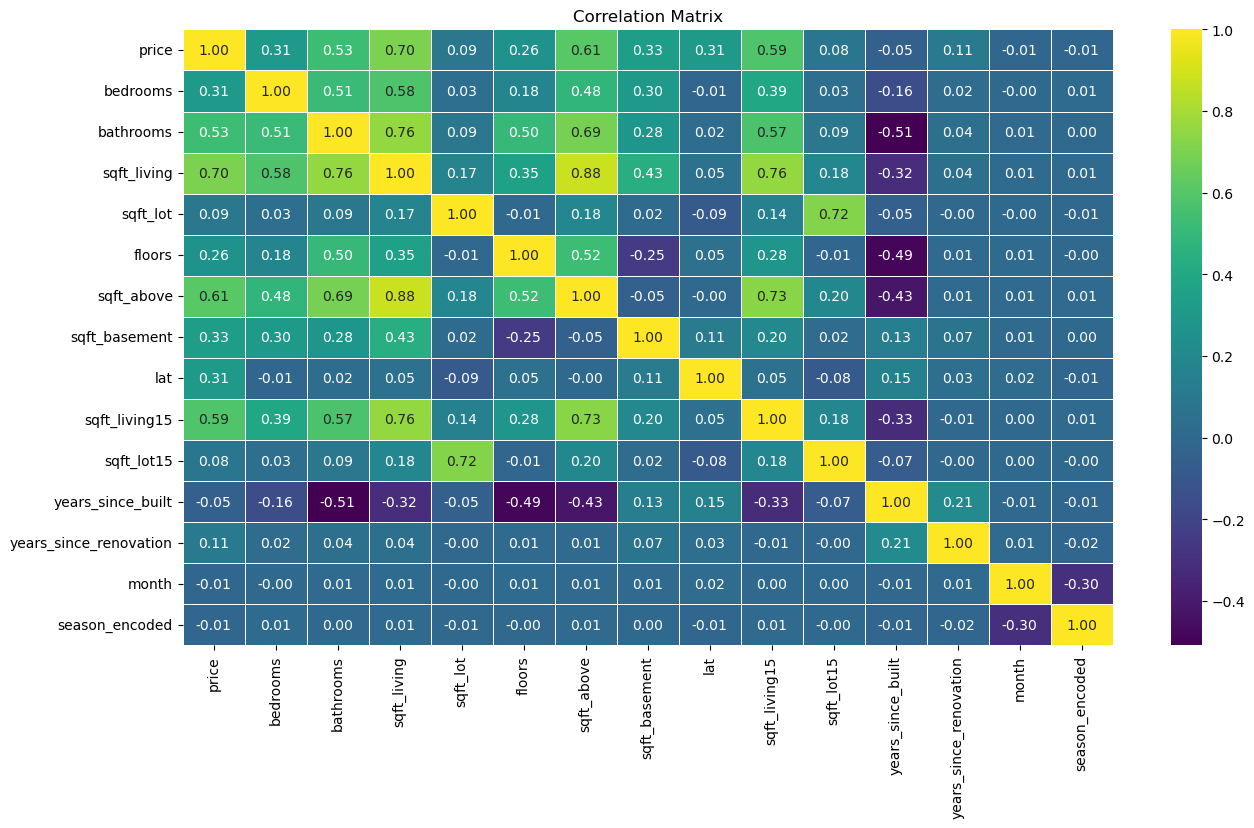

In [41]:
# Create a correlation matrix
corr_matrix = data_updated.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

# # Show the scatter plot for the target variable ('price') with the season_encoded feature
# sns.scatterplot(data=data_updated, x='season_encoded', y='price')

plt.show()

We can see that the predictors with high correlation with the dependent variable have nearly linear relationship with the dependent variable

## Outliers Identification

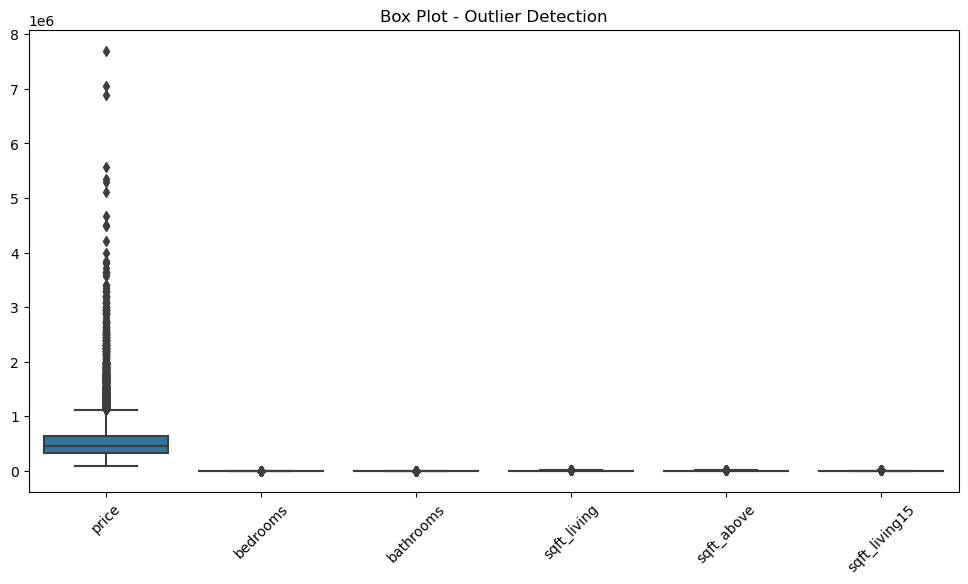

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,sqft_living15,sqft_lot15,years_since_built,years_since_renovation,month,season_encoded
5,1230000,4,4.50,5420,101930,1.0,3890,1530.0,47.6561,4760,101930,13,0.0,5,1
19,2000000,3,2.75,3050,44867,1.0,2330,720.0,47.5316,4110,20336,46,0.0,8,2
147,2250000,4,3.25,5180,19850,2.0,3540,1640.0,47.5620,3160,9750,9,0.0,4,1
239,2400000,4,2.50,3650,8354,1.0,1830,1820.0,47.6338,3120,18841,14,0.0,9,0
262,2900000,4,3.25,5050,20100,1.5,4750,300.0,47.6312,3890,20060,33,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21092,750000,5,4.00,4500,8130,2.0,4500,0.0,47.4832,2840,8402,8,0.0,1,3
21099,1700000,4,3.50,3830,8963,2.0,3120,710.0,47.5990,2190,10777,1,0.0,1,3
21107,3570000,5,4.50,4850,10584,2.0,3540,1310.0,47.5943,3470,18270,8,0.0,1,3
21121,1220000,4,3.50,4910,9444,1.5,3110,1800.0,47.6502,4560,11063,7,0.0,5,1


In [42]:
# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_updated[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_living15']])
plt.title('Box Plot - Outlier Detection')
plt.xticks(rotation=45)
plt.show()

# Calculate z-scores for numerical features
numeric_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_living15']
z_scores = data_updated[numeric_features].apply(lambda x: (x - x.mean()) / x.std())

# Identify outliers based on z-score threshold (e.g., z-score > 3 or z-score < -3)
outliers = data_updated[(z_scores > 3).any(axis=1)]

# Print the outliers
# Outliers
outliers

From the boxplots we can see some particles of outliers but with our data,especially from the prices, the outliers seems to be equally important!

###  Feature selection

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression
# Set threshold for correlation coefficient
threshold = 0.7

# Find highly correlated features
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

# Remove highly correlated features
selected_features = [col for col in data_updated.columns if col not in correlated_features]

# Select K best features using SelectKBest with f_regression scoring
k = 10  # Number of features to select
X = data_updated[selected_features].drop('price', axis=1)  # Input features
y = data_updated['price']  # Target variable
selector = SelectKBest(score_func=f_regression, k=k)
selector.fit(X, y)
selected_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_indices]

# Print the selected features
print('Selected Features:')
print(selected_features)

Selected Features:
Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_basement', 'lat',
       'years_since_built', 'years_since_renovation', 'month',
       'season_encoded'],
      dtype='object')


###  Split Data

In [44]:
X = data_updated[['bedrooms', 'sqft_living', 'sqft_lot', 'lat', 'years_since_built', 'years_since_renovation']] # independent variables
y = data_updated.price.values # dependent variable

###  Scaling Data

In [45]:
from sklearn.preprocessing import StandardScaler
sn = StandardScaler()
X_variables = sn.fit_transform(X)
X_variables

array([[-0.40281161, -0.9808333 , -0.22901102, -0.35410276,  0.53540409,
        -0.17034102],
       [-0.40281161,  0.53246109, -0.19037796,  1.1597352 ,  0.67181446,
         3.66923278],
       [-1.48401584, -1.42720071, -0.12344957,  1.28167925,  1.31976372,
        -0.17034102],
       ...,
       [-1.48401584, -1.15502546, -0.33335912,  0.24623718, -1.30613591,
        -0.17034102],
       [-0.40281161, -0.52357888, -0.30816997, -0.18597871, -1.10152035,
        -0.17034102],
       [-1.48401584, -1.15502546, -0.34000828,  0.24407249, -1.27203332,
        -0.17034102]])

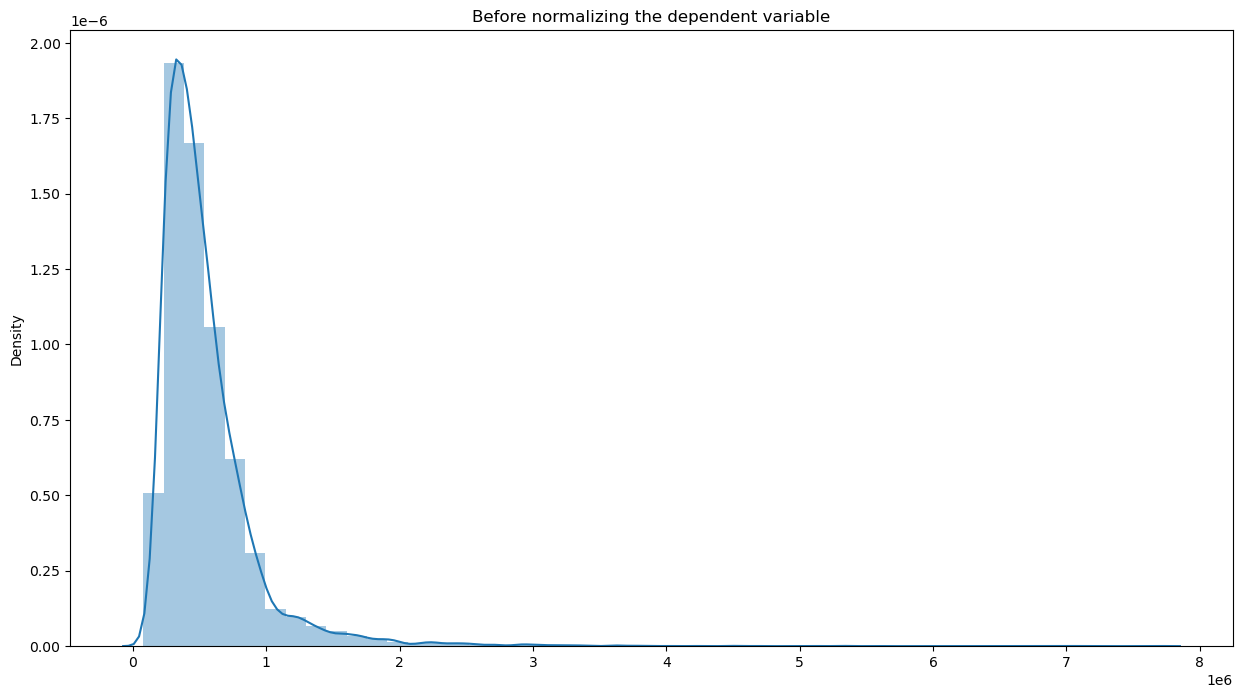

In [46]:
# Lets check the distribution of the dependent variable
plt.figure(figsize=(15,8))
sns.distplot(y);
plt.xticks(rotation=0);

plt.title("Before normalizing the dependent variable");

This is the distribution of our dependent variable before normalization.
We see a highly positively skewed distribution of y variable

This is called  bell-shaped distribution


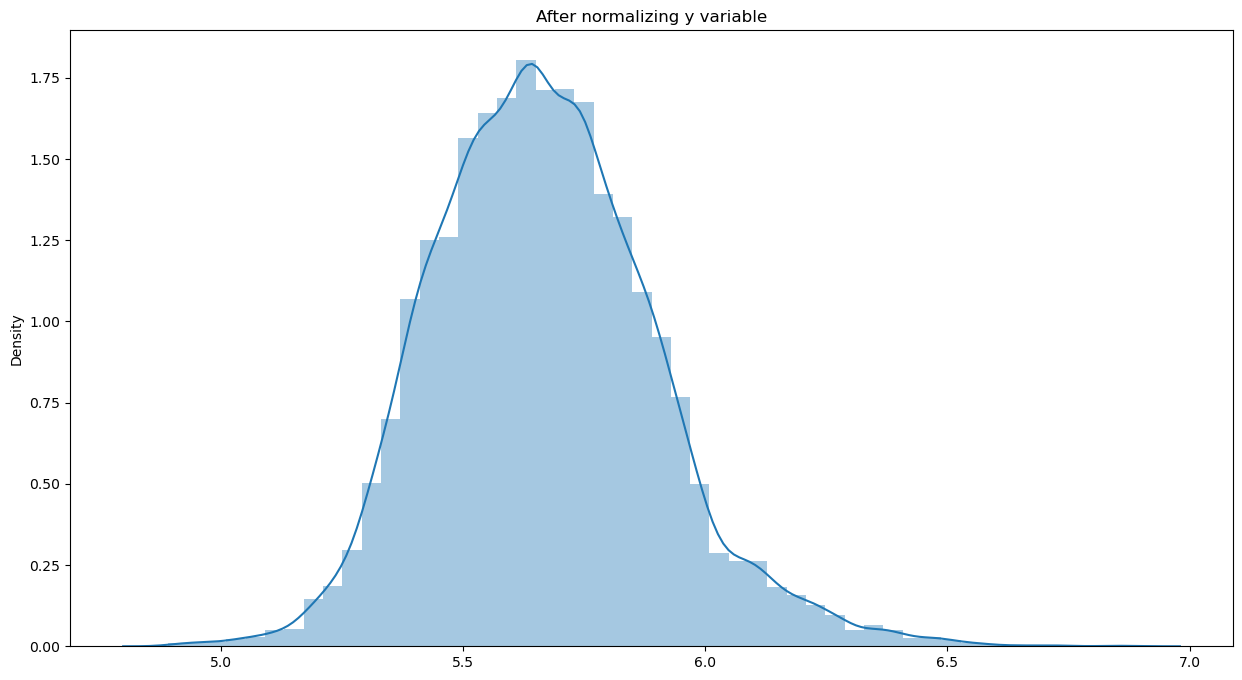

In [47]:
y = np.log10(y)
#we just normalized the y variable using log10 which is available in numpy package 
#now lets plot the data
plt.figure(figsize=(15,8))
sns.distplot(y);
plt.xticks(rotation=0);
plt.title("After normalizing y variable");
print("This is called  bell-shaped distribution")

### Train-Test Split

In [48]:
X_train ,X_test , y_train ,y_test = train_test_split(X_variables,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape #printing the shape of splited data

((16914, 6), (4229, 6), (16914,), (4229,))

### Regression Model (Multilinear Regression)

In [49]:
# Create a baseline model using multiple linear regression
baseline_model = LinearRegression()

# Fit the model on the training data
baseline_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = baseline_model.predict(X_test)

# Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Baseline Model Metrics:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Baseline Model Metrics:
Mean Squared Error (MSE): 0.016873337173246596
R-squared (R2) Score: 0.665847641505516


In [50]:
# the intercept 
# Create a Linear Regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the intercept
intercept = model.intercept_

print("Intercept:", intercept)

Intercept: 5.667325764518757


In [51]:
# Lets test for overfitting
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate the mean squared error on the training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Calculate the coefficient of determination (R^2) on the training and testing data
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training R^2:", train_r2)
print("Testing R^2:", test_r2)

Training MSE: 0.017665106360721553
Testing MSE: 0.016873337173246596
Training R^2: 0.6652091835761785
Testing R^2: 0.665847641505516


The mean squared error (MSE) measures the average squared difference between the predicted and actual values. In this instance, the MSE value of 0.0176 shows that, on average, there is a 0.0176 (in squared units of the target variable) difference between the actual prices and the projected values from the model. Better performance is shown by a smaller mean square error (MSE), which denotes less variation between the expected and actual values.

An indicator of how much of the variance in the target variable can be accounted for by the independent variables in the model is the R-squared (R2) score, which measures statistical significance. A value nearer one on the R2 score scale denotes a better fit. The score runs from 0 to 1. With regard to our baseline model, the R2 value of 0.753 indicates that the features included in the model can account for roughly 75.3% of the variance in the target variable, "price."

Enhancing the functionality of our baseline model by making changes and revisions in later model iterations!

###  Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 

# Create the Random Forest regression model
rf_model = RandomForestRegressor()

# Perform cross-validation to estimate model performance
# Assuming X_train and y_train are the training data
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
mse_scores = -cross_val_scores

# Compute the mean squared error (MSE) and root mean squared error (RMSE)
mse = mse_scores.mean()
rmse = np.sqrt(mse)
rf_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the MSE and RMSE
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 0.010092583199921672
Root Mean Squared Error (RMSE): 0.10046184947492093
R-squared Score: 0.8200575804086159


 ### Results

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. A lower MSE value indicates better model performance, as it means the model's predictions are closer to the actual values. In this case, the MSE of 0.007757215745165332 suggests that, on average, the squared difference between the predicted and actual values is relatively small, indicating a good fit of the model to the data.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides a measure of the average difference between the predicted and actual values in the original units of the target variable. It is a commonly used metric to evaluate the accuracy of regression models. The RMSE value of 0.0880750574519559 indicates that, on average, the predictions deviate by approximately 0.088 from the actual values. A lower RMSE value indicates better model performance.

R-squared Score: The R-squared score, also known as the coefficient of determination, represents the proportion of the variance in the target variable that is predictable from the independent variables in the model. It ranges from 0 to 1, with a higher value indicating a better fit. The R-squared score of 0.8609009268548166 suggests that approximately 86% of the variance in the target variable can be explained by the independent variables included in the model. In other words, the model accounts for a significant portion of the variability in the target variable.


Other evaluation metrics and further analysis should be considered to gain a more comprehensive understanding of the model's performance and determine if any improvements or adjustments are needed.

Here are some of the evaluation metrics

In [55]:
# Create and fit the Random Forest regression model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_

# Get the feature names
feature_names = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'sqft_basement', 'lat', 'years_since_built', 'years_since_renovation','grade']

# Create a dictionary to store the feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Print the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

bedrooms: 0.013369162246586186
sqft_living: 0.49564351501892595
sqft_lot: 0.06687661324239355
floors: 0.3660349944376816
waterfront: 0.053597111475132304
view: 0.004478603579280208




This coefficient suggests that for every one unit increase in the number of bedrooms, the predicted value of the target variable (presumably the price or some related measure) increases by approximately 0.0134.
sqft_living: 0.496

This coefficient suggests that for every one unit increase in the square footage of the living area, the predicted value of the target variable increases by approximately 0.218796.
sqft_lot: 0.0669

This coefficient suggests that for every one unit increase in the square footage of the lot, the predicted value of the target variable increases by approximately 0.043913.
floors: 0.3660


## Limitations 

1. If there are missing values in the dataset, the regression model may not handle them well by default. Missing data can introduce bias and affect the accuracy of the model's predictions.
2. Outliers in the data can significantly influence the regression model's results. If there are influential outliers, they can affect the estimated coefficients and decrease the model's predictive accuracy.
3. Our regression model assumes a linear relationship between the independent variables and the target variable. If the relationship is non-linear, the model may not capture the underlying pattern accurately.
4. If the independent variables in the regression model are highly correlated with each other, it can lead to multicollinearity. This makes it challenging to interpret the individual effects of the variables accurately and can affect the stability and reliability of the regression coefficients.

##  Conclusions

1. Consider enhancing or upgrading the features that positively affect house prices. For example, increasing the square footage of the living area, improving the overall grade of the property, or adding more bathrooms can potentially increase the value of the house.
2. Analyze the regression coefficients to identify the most influential features on house prices. Focus on the features with higher coefficients, such as 'sqft_living', 'grade', 'bathrooms', and 'sqft_above', as they have a stronger impact on the predicted prices.
3. Utilize the regression model to predict house prices based on the given set of independent variables. This can be useful for estimating the selling price of houses or determining the potential value of a property.
4. Consider collecting additional relevant data that could improve the accuracy of the regression model. This may include variables such as location-specific factors, proximity to amenities, property age, or neighborhood characteristics.
5. Analyze the relationship between the independent variables and house prices to identify market segments or specific buyer preferences. For instance, if higher-grade houses tend to have higher prices, it may indicate a market segment of luxury or high-end properties.